Primer punto:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del cometa Halley
e = 0.9672671          # excentricidad
T = 75.96              # período en años
t0 = 1986.1113         # tiempo inicial en años
tabril = 1986 + (31 + 28 + 31) / 365  # 1 de abril de 1986 → día 91 ( 31 de enero, 28 de febrero, 31 de marzo)

def M(t, T=T, t0=t0):
    return (2 * np.pi / T) * (t - t0)

Mabril = M(tabril)

# Función f(E)
def f(E, e, M):
    return E - e * np.sin(E) - M

# Derivada f'(E) para Newton-Raphson
def df(E, e):
    return 1 - e * np.cos(E)

# Método de Newton-Raphson
def newton(e, M, E0=0.5, tol=1e-10, max_iter=100):
    E = E0
    for _ in range(max_iter):
        E_nueva = E - f(E, e, M) / df(E, e)
        if abs(E_nueva - E) < tol:
            return E_nueva
        E = E_nueva
    return E

# Método de la secante
def secante(e, M, E0=0.5, E1=0.6, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        f0 = f(E0, e, M)
        f1 = f(E1, e, M)
        if f1 - f0 == 0:
            return E1
        E2 = E1 - f1 * (E1 - E0) / (f1 - f0)
        if abs(E2 - E1) < tol:
            return E2
        E0, E1 = E1, E2
    return E1


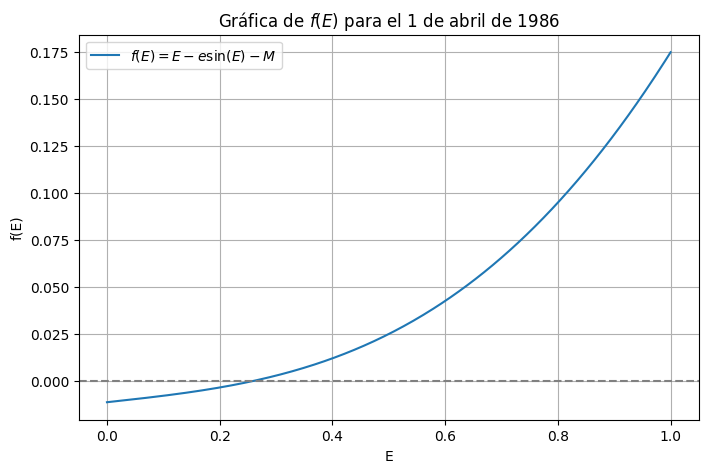

In [5]:
# Grafico f(E) en el intervalo [0, 1]
E_valores = np.linspace(0, 1, 400)
f_valores= f(E_valores, e, Mabril)

plt.figure(figsize=(8, 5))
plt.plot(E_valores, f_valores, label=r"$f(E) = E - e\sin(E) - M$")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("E")
plt.ylabel("f(E)")
plt.title("Gráfica de $f(E)$ para el 1 de abril de 1986")
plt.grid(True)
plt.legend()
plt.show()


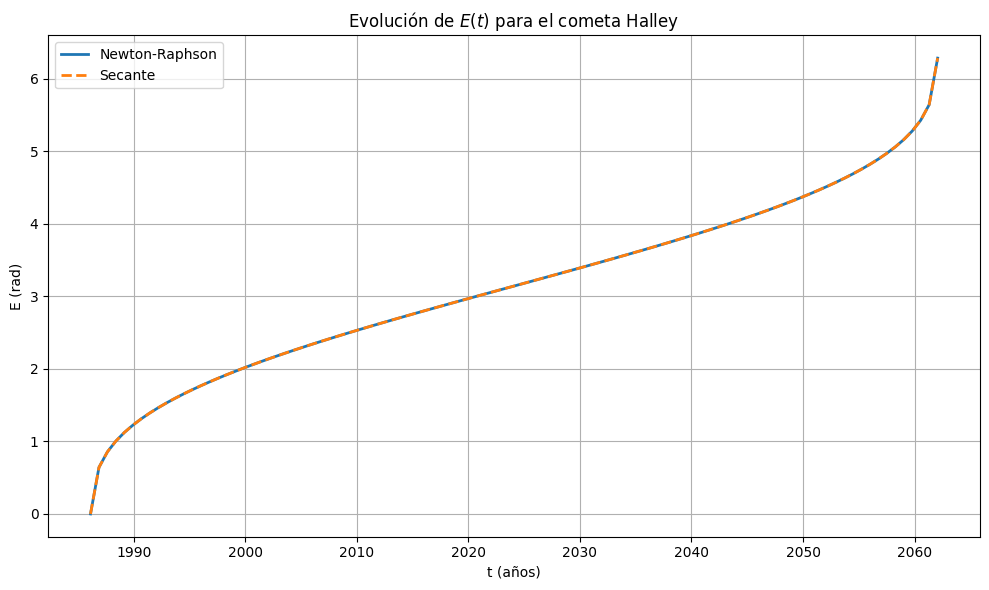

In [7]:
# Para un periodo de revolucion
N = 100
dt = T / N
t_valores = t0 + np.arange(N+1) * dt
M_valores = M(t_valores)

# Resolver E(t) usando ambos métodos
Enewtonvalores = np.zeros_like(t_valores)
Esecantevalores = np.zeros_like(t_valores)

# Condiciones iniciales: E(t0) = 0
Enewtonvalores[0] = 0
Esecantevalores[0] = 0

# Iteración para i = 1 hasta N
for i in range(1, N+1):
    Enewtonvalores[i] = newton(e, M_valores[i], E0=Enewtonvalores[i-1])
    Esecantevalores[i] = secante(e, M_valores[i], E0=Esecantevalores[i-1], E1=Esecantevalores[i-1] + 0.1)

# Gráfica de E(t)
plt.figure(figsize=(10, 6))
plt.plot(t_valores, Enewtonvalores, label="Newton-Raphson", lw=2)
plt.plot(t_valores, Esecantevalores, '--', label="Secante", lw=2)
plt.xlabel("t (años)")
plt.ylabel("E (rad)")
plt.title("Evolución de $E(t)$ para el cometa Halley")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Punto 2:

Resultados para T = 0.5
Newton-Raphson: m = 0.9575
Método Secante: m = 0.9575
Punto Fijo    : m = 0.9575


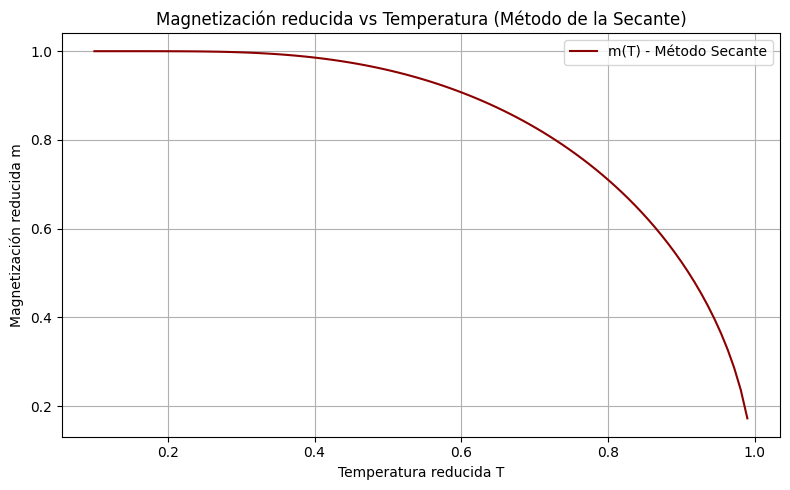

In [8]:
def f(m, T):
    return m - np.tanh(m / T)

# Derivada para Newton-Raphson
def df(m, T):
    return 1 - (1 / T) * (1 / np.cosh(m / T))**2

# Método de Newton-Raphson
def newton(f, df, x0, T, tol=1e-10, max_iter=100):
    xi = x0
    for _ in range(max_iter):
        fxi = f(xi, T)
        dfxi = df(xi, T)
        if dfxi == 0:
            break
        xi1 = xi - fxi / dfxi
        if abs(xi1 - xi) < tol:
            return xi1
        xi = xi1
    return xi

# Método de la secante
def secante(f, x0, x1, T, tol=1e-10, max_iter=100):
    for _ in range(max_iter):
        f0 = f(x0, T)
        f1 = f(x1, T)
        if f1 - f0 == 0:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return x1

# Método de punto fijo: m = tanh(m / T)
def punto_fijo(T, x0=0.5, tol=1e-10, max_iter=100):
    xi = x0
    for _ in range(max_iter):
        xi1 = np.tanh(xi / T)
        if abs(xi1 - xi) < tol:
            return xi1
        xi = xi1
    return xi

##########################################################

T = 0.5
m_newton = newton(f, df, x0=0.9, T=T)
m_secante = secante(f, x0=0.5, x1=0.9, T=T)
m_pfijo = punto_fijo(T, x0=0.5)

print("Resultados para T = 0.5")
print(f"Newton-Raphson: m = {m_newton:.4f}")
print(f"Método Secante: m = {m_secante:.4f}")
print(f"Punto Fijo    : m = {m_pfijo:.4f}")

###############################################

T_vals = np.linspace(0.1, 0.99, 100)
m_vals = [secante(f, 0.5, 0.9, T) for T in T_vals]

plt.figure(figsize=(8, 5))
plt.plot(T_vals, m_vals, label='m(T) - Método Secante', color='darkred')
plt.xlabel("Temperatura reducida T")
plt.ylabel("Magnetización reducida m")
plt.title("Magnetización reducida vs Temperatura (Método de la Secante)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Punto 3:

In [14]:
R = 8.314  # J/K
T0 = 4.444  # K
G_dado = -1e5  # J

def f(T):
    return -R * T * (5/2) * np.log(T / T0) - G_dado

# Derivada para Newton-Raphson
def df(T):
    return -R * (5/2) * (np.log(T / T0) + 1)

# Método de Newton-Raphson
def newton(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            break
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x


T_sol = newton(f, df, x0=4444)
print(f"Temperatura T donde G = -1e5 J: T = {T_sol:.4f} K")


Temperatura T donde G = -1e5 J: T = 904.9743 K


Punto 4:

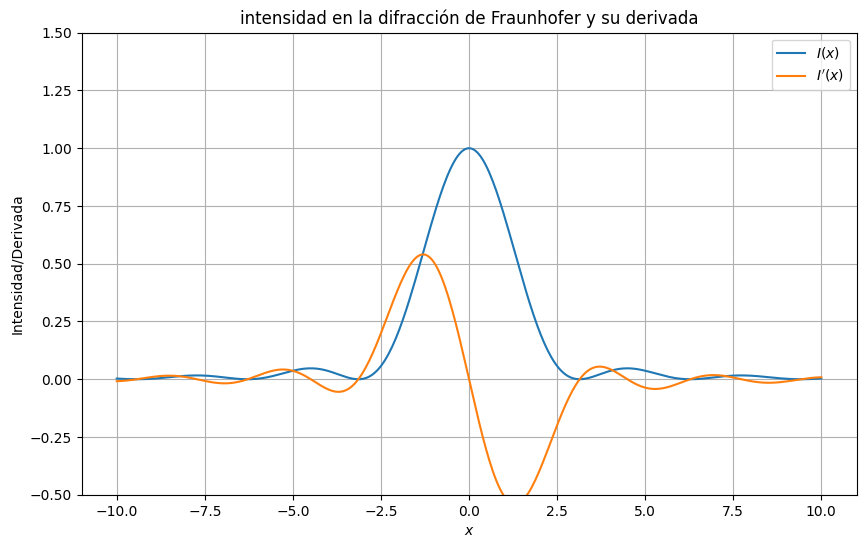

Metodo de la secante falla: denominador muy pequeño.

Maximo local xi (raices de I'(x) en [-10, 10]):
-9.424779
-7.725252
-6.283201
-4.493410
-3.141594
3.141594
4.493410
6.283201
7.725252
9.424779

Maximos locales filtrados xi (raices de I'(x) donde I(x) > 0):
-7.725252
-4.493410
4.493410
7.725252


In [30]:
def I(x):
  if x == 0:
    return 1
  else:
    return (np.sin(x) / x)**2

def dI_dx(x):
  if x == 0:
    return 0
  else:
    return 2 * (np.sin(x) / x) * (x * np.cos(x) - np.sin(x)) / x**2


x_valores = np.linspace(-10, 10, 400)
I_values = [I(x) for x in x_valores]
dI_dx_valores = [dI_dx(x) for x in x_valores]


plt.figure(figsize=(10, 6))
plt.plot(x_valores, I_values, label='$I(x)$')
plt.plot(x_valores, dI_dx_valores, label="$I'(x)$")
plt.title('intensidad en la difracción de Fraunhofer y su derivada')
plt.xlabel('$x$')
plt.ylabel('Intensidad/Derivada')
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()

def f_05intensidad(x):
  return I(x) - 0.5

def secante(func, x0, x1, tol=1e-6, max_iter=100):
  for _ in range(max_iter):
    f0 = func(x0)
    f1 = func(x1)
    if abs(f1) < tol:
      return x1
    if abs(f1 - f0) < 1e-10:
        print("Metodo de la secante falla: denominador muy pequeño.")
        return None
    x_new = x1 - f1 * (x1 - x0) / (f1 - f0)
    x0 = x1
    x1 = x_new
  print("Metodo de la secante no converge dentro del maximo numero de iteraciones.")
  return x1


x0_secante = np.pi

x1_secante = np.pi + 0.1
x_05 = secante(f_05intensidad, x0_secante, x1_secante)

if x_05 is not None:
  print(f"Los valores positivos para x_1/2 donde I(x) = I0/2 es aproximadamente: {x_05:.6f}")


def f_derivada(x):
    return dI_dx(x)

def regula_falsi(func, a, b, tol=1e-6, max_iter=100):
  if func(a) * func(b) >= 0:

    return None

  for _ in range(max_iter):
    fa = func(a)
    fb = func(b)
    c = (a * fb - b * fa) / (fb - fa)
    fc = func(c)

    if abs(fc) < tol:
      return c

    if fa * fc < 0:
      b = c
    else:
      a = c
  return c


raicesderivada = []
h = 0.5
x_range = np.arange(-10, 10 + h, h)
tol = 1e-6
for i in range(len(x_range) - 1):
  a = x_range[i]
  b = x_range[i+1]

  if abs(a) > 1e-3 and abs(b) > 1e-3:
    raices = regula_falsi(f_derivada, a, b)
    if raices is not None and abs(raices) > 1e-3 :

        raices1 = True
        for raicesexistentes in raicesderivada:
            if abs(raices - raicesexistentes) < tol:
                root1 = False
                break
        if raices1:
            raicesderivada.append(raices)

raicesderivada.sort()

print("\nMaximo local xi (raices de I'(x) en [-10, 10]):")
for raices in raicesderivada:
    print(f"{raices:.6f}")

maximoslocales= [raices for raices in raicesderivada if abs(I(raices)) > 1e-6]

print("\nMaximos locales filtrados xi (raices de I'(x) donde I(x) > 0):")
for loc in maximoslocales:
    print(f"{loc:.6f}")

Punto 5:

<ipython-input-34-cbd8566a8c98>:54: RuntimeWarning: overflow encountered in scalar power
  denominador = lam**6 * (exp_term - 1)**2


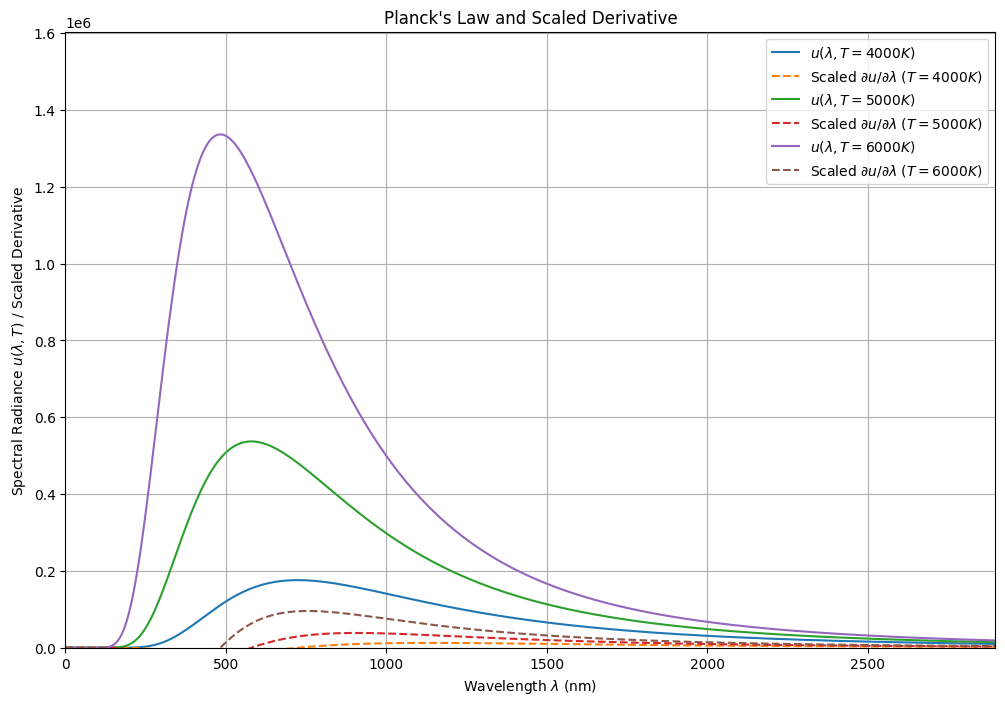


Raices de g(x) usando biseccion 4.965115
 Lambda maximo para T=5778K usando biseccion: 0.000000501 m

Raices de g(x) usando el metodo de Newton: 4.965114
Lambda maximo para T=5778K usadndo el metodo de newton: 0.000000501 m

Wien's producto (lambda_max * T) usando biseccion: 0.002897077 m K
Diferencia con la wien constante teorica: 0.000000923 m K
Wien's producto (lambda_max * T) usando newton: 0.002897078 m K
Diferencia con la wien constante teorica: 0.000000922 m K

Lambda_max para T=5778K : 0.000000501 m
Wien's producto (lambda_max * T) : 0.002897078 m K
Diferencia con la wien constante teorica: 0.000000922 m K

Raices de la derivada adimensional en terminos de x (1/y_raices): 0.201405
Lambda_max para T=5778K calculada usando x_raices: 0.000000501 m
Wien's producto (lambda_max * T) usando x_raices: 0.002897078 m K
Diferencia con la wien constante teorica: 0.000000922 m K

du/dlambda at 540.00 nm para T=5778K: 375343.373232205
du/dlambda at 560.00 nm para T=5778K: 539858.3460354569


In [34]:
h = 6.626e-34
k_B = 1.381e-23
c = 2.998e8

def lambda_0(T):
  return h * c / (k_B * T)

def K(T):
  return 8 * np.pi * k_B * T / (lambda_0(T)**4)

def u_adimensional(x):
  if x == 0:
      return 0

  exp_valores = np.exp(1/x)
  if exp_valores > 1e10:
      return 0
  return 1 / (x**5 * (exp_valores - 1))


def du_dlambda_adimensional(x):
  if x == 0:
    return 0

  exp_valores = np.exp(1/x)
  if exp_valores > 1e10:
      return 0
  numerador = 5 * x + (1 - 5 * x) * exp_valores
  denominador = x**7 * (exp_valores - 1)**2
  if denominador == 0:
      return np.inf * np.sign(numerador) if numerador != 0 else 0
  return numerador / denominador


def u_planck(lam, T):
    if lam == 0:
        return 0
    term = h * c / (lam * k_B * T)

    if term > 700:
        return 0
    return (8 * np.pi * h * c) / (lam**5 * (np.exp(term) - 1))


def du_dlambda_planck(lam, T):
    if lam == 0:
        return 0
    term = h * c / (lam * k_B * T)

    if term > 700:
         return 0
    exp_term = np.exp(term)
    numerador = 5 * lam * (exp_term - 1) - (h * c / (k_B * T)) * exp_term
    denominador = lam**6 * (exp_term - 1)**2
    if denominador == 0:
        return np.inf * np.sign(numerador) if numerador != 0 else 0
    return (8 * np.pi * h * c) * numerador / denominador



T_valores_plot = [4000, 5000, 6000]

lambda_max = [2.898e-3 / T for T in T_valores_plot]
max_lambda_range = 5 * max(lambda_max)
lambda_valores_plot = np.linspace(1e-9, max_lambda_range, 500)

plt.figure(figsize=(12, 8))


for T in T_valores_plot:
    u_valores = [u_planck(lam, T) for lam in lambda_valores_plot]
    dudlambda_valores = [du_dlambda_planck(lam, T) for lam in lambda_valores_plot]

    plt.plot(lambda_valores_plot * 1e9, u_valores, label=f'$u(\lambda, T={T}K)$')


    max_u = max(u_valores) if max(u_valores) > 0 else 1
    max_abs_dudlambda = max(abs(val) for val in dudlambda_valores) if max(abs(val) for val in dudlambda_valores) > 0 else 1
    escala_factor = max_u / max_abs_dudlambda if max_abs_dudlambda > 0 else 1
    escala_dudlambda_valores= [val * escala_factor * 0.1 for val in dudlambda_valores]

    plt.plot(lambda_valores_plot * 1e9, escala_dudlambda_valores, '--', label=f'Scaled $\partial u/\partial \lambda$ ($T={T}K$)')


plt.title('Planck\'s Law and Scaled Derivative')
plt.xlabel('Wavelength $\lambda$ (nm)')
plt.ylabel('Spectral Radiance $u(\lambda, T)$ / Scaled Derivative')
plt.grid(True)
plt.legend()
plt.xlim(0, max_lambda_range * 1e9 * 0.8)
plt.ylim(0, max(max(u_values) for T in T_valores_plot for u_values in [[u_planck(lam, T) for lam in lambda_valores_plot]] if u_values) * 1.2)
plt.show()


##########################################
T_sol = 5778

def g(x):
  return x - 5 * (1 - np.exp(-x))


def dg_dx(x):
  return 1 - 5 * np.exp(-x)


def biseccion(func, a, b, tol=1e-6, max_iter=100):
  if func(a) * func(b) >= 0:
    print("El metodo de la Biseccion requiere f(a)  y f(b) tengan signos opuestos.")
    return None

  for _ in range(max_iter):
    c = (a + b) / 2
    fc = func(c)

    if abs(fc) < tol or (b - a) / 2 < tol:
      return c

    if func(a) * fc < 0:
      b = c
    else:
      a = c
  print("Metodo de la biseccion no converge dentro del numero maximo de iteraciones.")
  return (a + b) / 2

def newton(func, dfunc, x0, tol=1e-6, max_iter=100):
  x = x0
  for _ in range(max_iter):
    f_x = func(x)
    df_x = dfunc(x)

    if abs(f_x) < tol:
      return x

    if abs(df_x) < 1e-10:
      print("Metodo de newton falla: derivada muy pequeña")
      return None

    x_nuevo = x - f_x / df_x
    x = x_nuevo
  print("Metodo de newton no converge dentro del numero maximo de iteraciones.")
  return x

a_biseccion = 1
b_biseccion = 5
x_raices_biseccion = biseccion(g, a_biseccion, b_biseccion)

if x_raices_biseccion is not None:
  print(f"\nRaices de g(x) usando biseccion {x_raices_biseccion:.6f}")

  lambda_max_biseccion = (h * c) / (x_raices_biseccion * k_B * T_sol)
  print(f" Lambda maximo para T={T_sol}K usando biseccion: {lambda_max_biseccion:.9f} m")


x0_newton = b_biseccion
x_raices_newton = newton(g, dg_dx, x0_newton)

if x_raices_newton is not None:
  print(f"\nRaices de g(x) usando el metodo de Newton: {x_raices_newton:.6f}")

  lambda_max_newton = (h * c) / (x_raices_newton * k_B * T_sol)
  print(f"Lambda maximo para T={T_sol}K usadndo el metodo de newton: {lambda_max_newton:.9f} m")


wien_constante_theoretica = 2.898e-3

if x_raices_biseccion is not None:
    wien_producto_biseccion = lambda_max_biseccion * T_sol
    print(f"\nWien's producto (lambda_max * T) usando biseccion: {wien_producto_biseccion:.9f} m K")
    print(f"Diferencia con la wien constante teorica: {abs(wien_producto_biseccion - wien_constante_theoretica):.9f} m K")

if x_raices_newton is not None:
    wien_producto_newton = lambda_max_newton * T_sol
    print(f"Wien's producto (lambda_max * T) usando newton: {wien_producto_newton:.9f} m K")
    print(f"Diferencia con la wien constante teorica: {abs(wien_producto_newton - wien_constante_theoretica):.9f} m K")


y_raices = x_raices_newton
if y_raices is not None:
    lambda_max_correct = (h * c) / (y_raices * k_B * T_sol)
    print(f"\nLambda_max para T={T_sol}K : {lambda_max_correct:.9f} m")
    wien_product_correct = lambda_max_correct * T_sol
    print(f"Wien's producto (lambda_max * T) : {wien_product_correct:.9f} m K")
    print(f"Diferencia con la wien constante teorica: {abs(wien_product_correct - wien_constante_theoretica):.9f} m K")


def f_adimensional_derivada_raices(x):
    if x == 0:
        return np.inf
    return 5 * x + (1 - 5 * x) * np.exp(1 / x)

if y_raices is not None:
  x_raices_de_y = 1 / y_raices
  print(f"\nRaices de la derivada adimensional en terminos de x (1/y_raices): {x_raices_de_y:.6f}")

  lambda_0_sol = lambda_0(T_sol)
  lambda_max_final = x_raices_de_y * lambda_0_sol
  print(f"Lambda_max para T={T_sol}K calculada usando x_raices: {lambda_max_final:.9f} m")
  wien_producto_final = lambda_max_final * T_sol
  print(f"Wien's producto (lambda_max * T) usando x_raices: {wien_producto_final:.9f} m K")
  print(f"Diferencia con la wien constante teorica: {abs(wien_producto_final - wien_constante_theoretica):.9f} m K")


T_check = 5778
lam_test1 = 5.4e-7
lam_test2 = 5.6e-7

deriv1 = du_dlambda_planck(lam_test1, T_check)
deriv2 = du_dlambda_planck(lam_test2, T_check)

print(f"\ndu/dlambda at {lam_test1*1e9:.2f} nm para T={T_check}K: {deriv1}")
print(f"du/dlambda at {lam_test2*1e9:.2f} nm para T={T_check}K: {deriv2}")


a_biseccion_lam = 5.0e-7
b_biseccion_lam = 5.1e-7

def deriv_func_raices(lam):
    return du_dlambda_planck(lam, T_sol)

deriv_a = deriv_func_raices(a_biseccion_lam)
deriv_b = deriv_func_raices(b_biseccion_lam)

print(f"\n Derivada para {a_biseccion_lam*1e9:.2f} nm: {deriv_a}")
print(f" Derivada para{b_biseccion_lam*1e9:.2f} nm: {deriv_b}")


if deriv_a * deriv_b < 0:
    lambda_max_biseccion_directa = biseccion(deriv_func_raices, a_biseccion_lam, b_biseccion_lam)
    if lambda_max_biseccion_directa is not None:
        print(f"\nLambda_max para T={T_sol}K usando biseccion en du/dlambda: {lambda_max_biseccion_directa:.9f} m")
        wien_product_biseccion_directa = lambda_max_biseccion_directa * T_sol
        print(f"Wien's producto (lambda_max * T) usando biseccion directa: {wien_product_biseccion_directa:.9f} m K")
else:
    print("\nNo puede encontrar un intervalo para la biseccion en du/dlambda con los limites elegidos.")
    print("Intenta ajustar el intervalo [a_bisection_lam, b_bisection_lam].")

